# End-to-End-Customer-Churn-Analytics

# Loading the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style="whitegrid")

In [3]:
churn_data = pd.read_csv('Customer Churn.csv')
churn_data.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


# Performing EDA

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

The dataset has no missing values and the data types are also correct. Before moving on let's just write down what features we have, what they mean, and how they are encoded.


| Feature Name              | Description                                                        |
|---------------------------|--------------------------------------------------------------------|
| Anonymous Customer ID     | Unique identifier for each customer                                |
| Call Failures             | Number of call failures                                            |
| Complains                 | Binary (0: No complaint, 1: Complaint)                             |
| Subscription Length       | Total months of subscription                                       |
| Charge Amount             | Ordinal attribute (0: lowest amount, 9: highest amount)            |
| Seconds of Use            | Total seconds of calls                                             |
| Frequency of Use          | Total number of calls                                              |
| Frequency of SMS          | Total number of text messages                                      |
| Distinct Called Numbers   | Total number of distinct phone calls                               |
| Age Group                 | Ordinal attribute (1: younger age, 5: older age)                   |
| Tariff Plan               | Binary (1: Pay as you go, 2: Contractual)                          |
| Status                    | Binary (1: Active, 2: Non-active)                                  |
| Churn                     | Binary (1: Churn, 0: Non-churn) - Class label                     |
| Customer Value            | The calculated value of customer                                   |

Now, We would love to look at some summary statistics of those features.

In [5]:
churn_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


This summary is fine,but it would be better to look at some graph that summarizes this visually.

First, let's look at the distribution of each feature using **Histograms** for Continous Features and **Bar plots** for Categorical feature

In [54]:
# define categorical and numerical features each on in a list
categorical_features = [
    'Complains', 'Charge  Amount', 'Age Group', 'Tariff Plan', 'Status', 'Churn'
]
numerical_features = [
    'Call  Failure', 'Subscription  Length', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
    'Distinct Called Numbers', 'Customer Value'
]

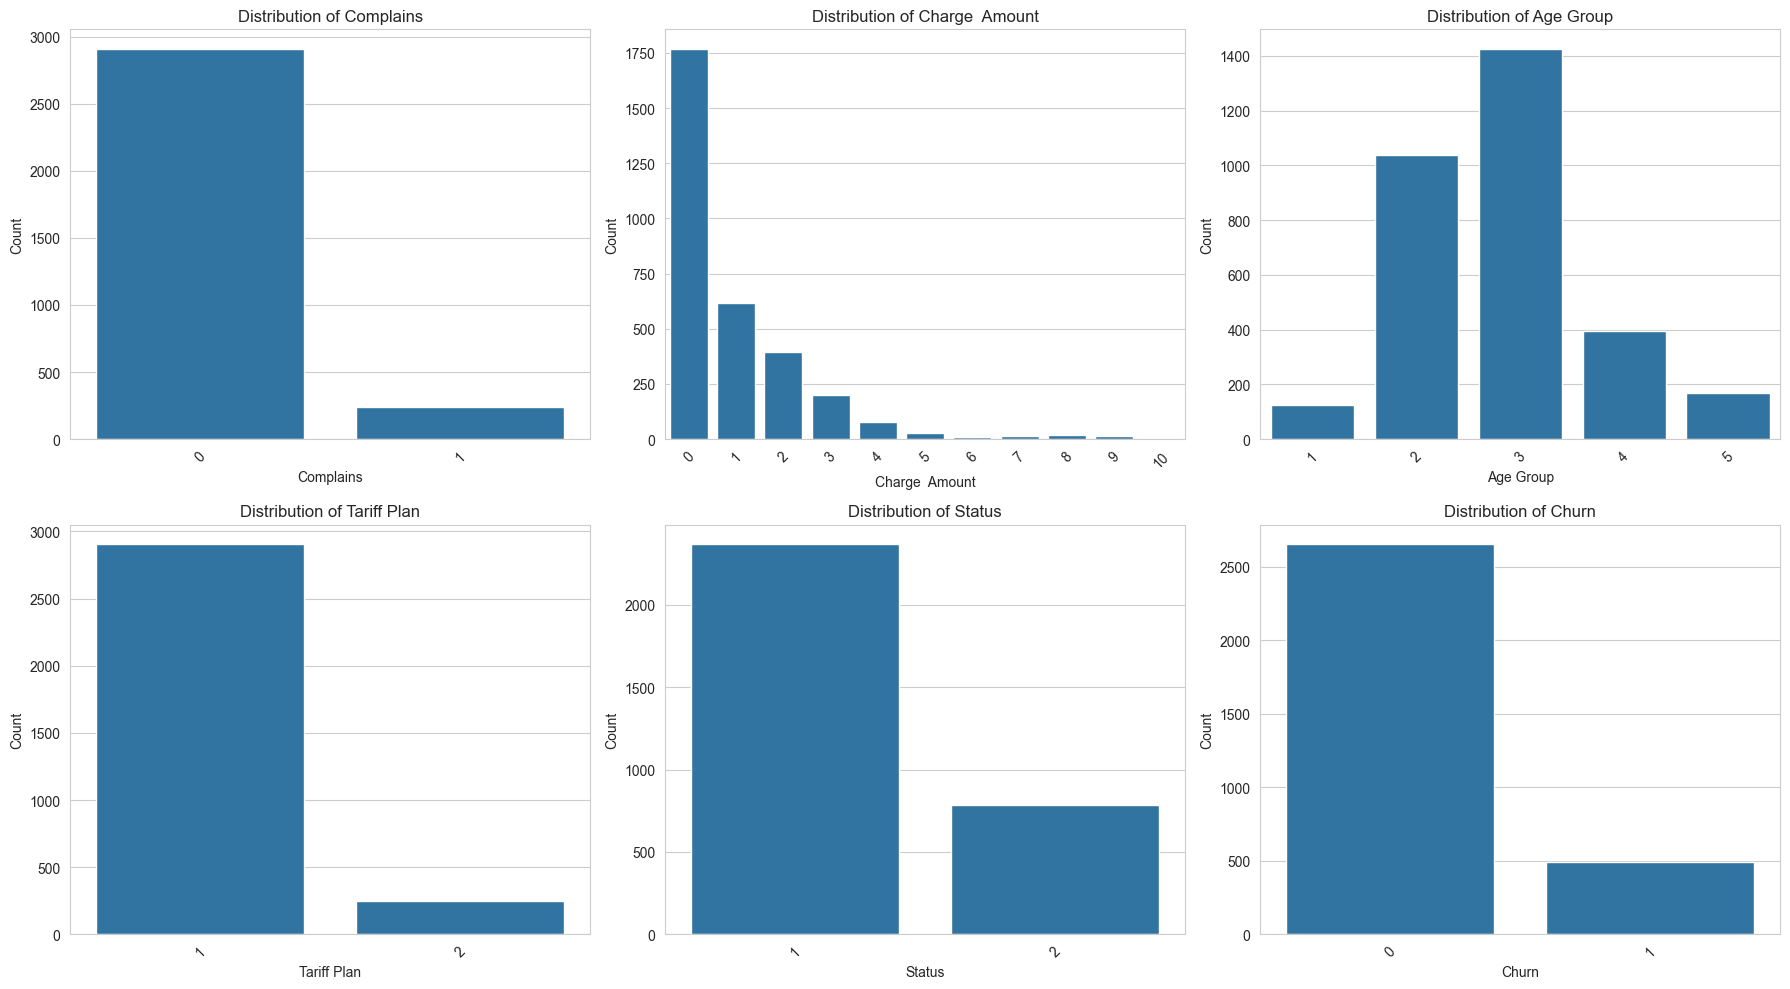

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, c in enumerate(categorical_features):
    sns.countplot(data=churn_data, x=c, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {c}')
    axes[idx].set_xlabel(c)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

We can see that we have noticable **Class Imbalance** not only in 2 features (`complains` and `Tariff Plan`), but we also have **Class Imbalance** in the **Label** (`Churn`) being less than 20% of the data

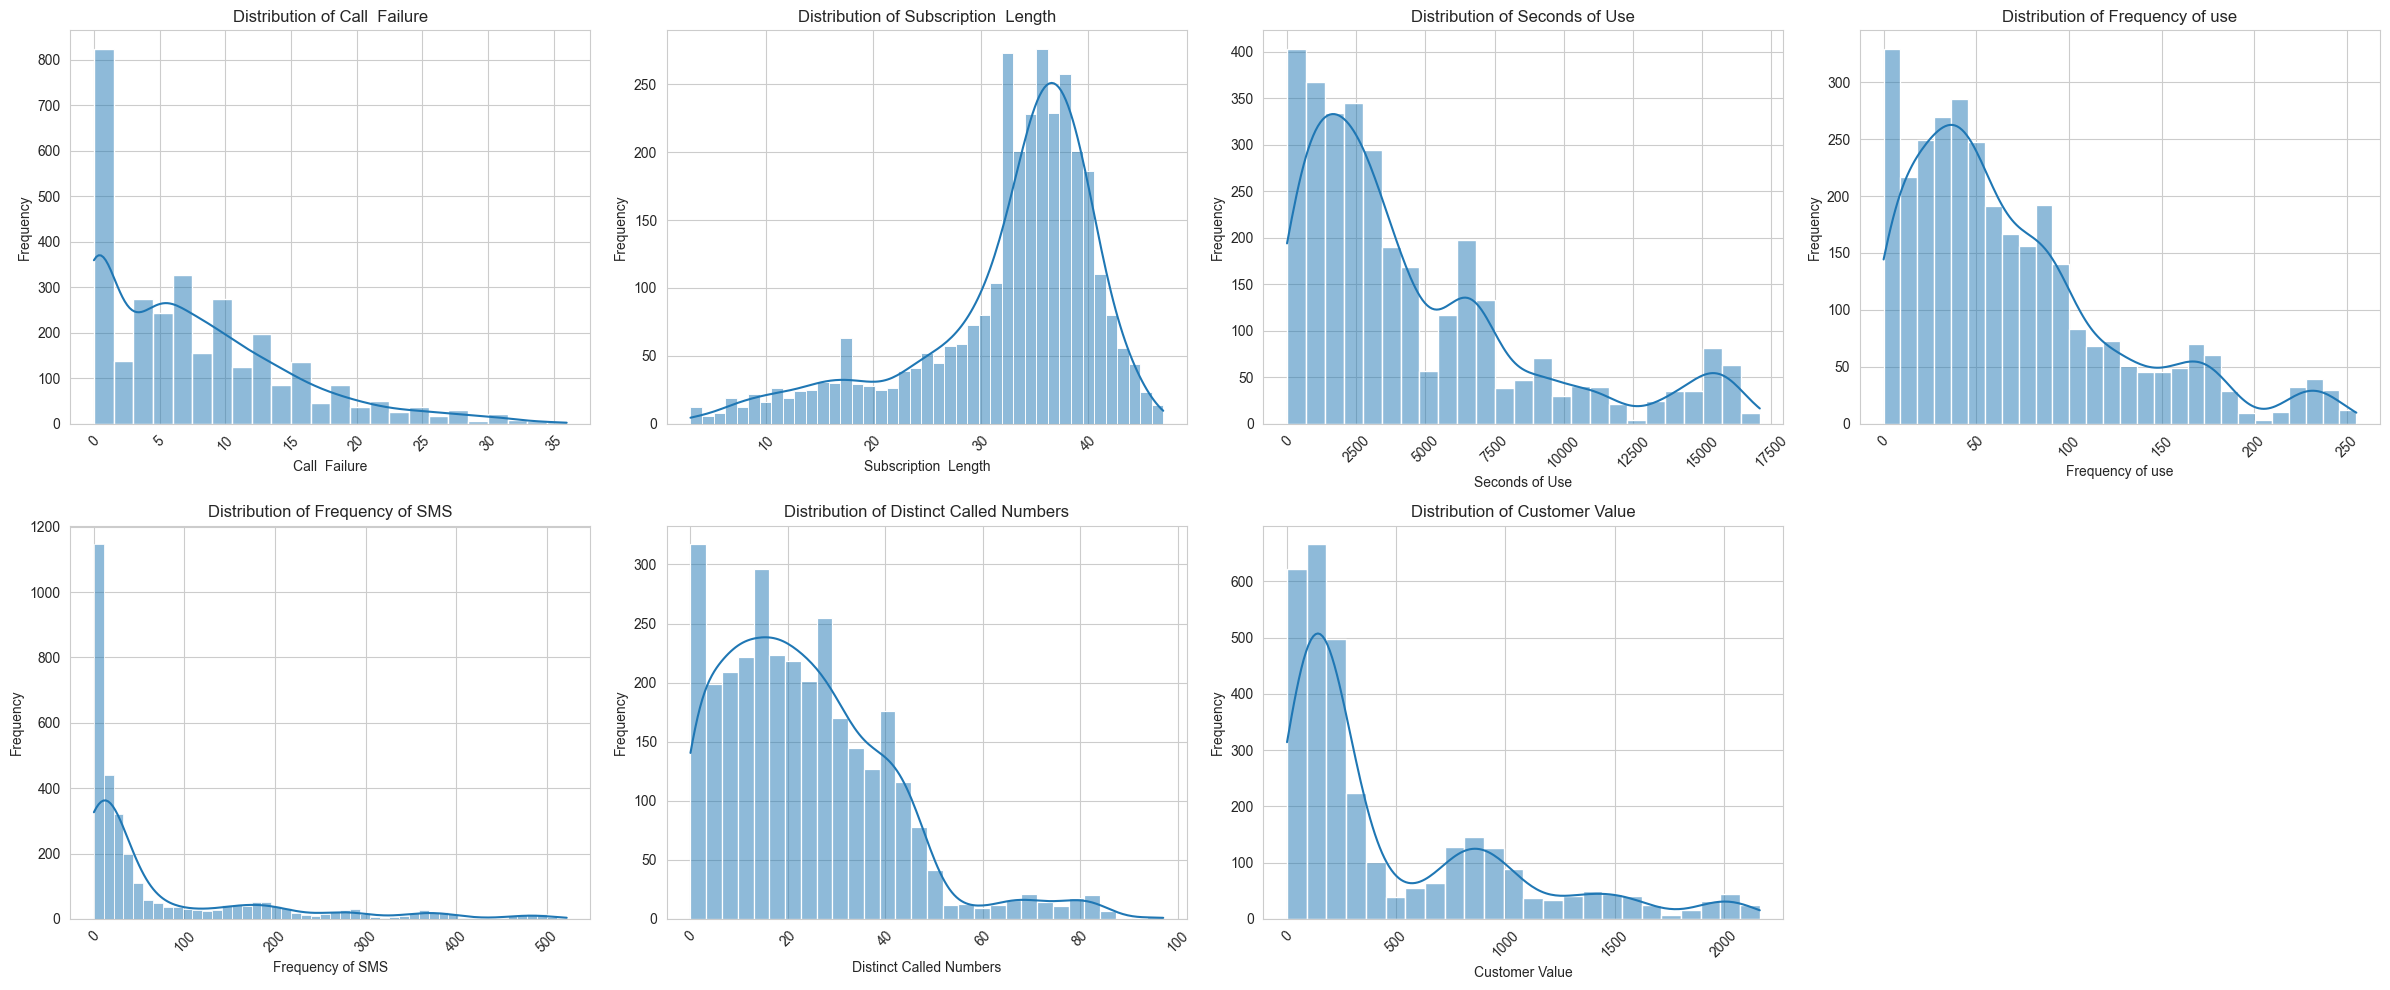

In [58]:
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()

for idx, n in enumerate(numerical_features):
    sns.histplot(data=churn_data, x=n, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {n}')
    axes[idx].set_xlabel(n)
    axes[idx].set_ylabel('Frequency')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots if numerical_features < 8
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The main reason to plot these distribution is to see if we may later need to normalize features or use transformations to fix the skewness depending on the used model.

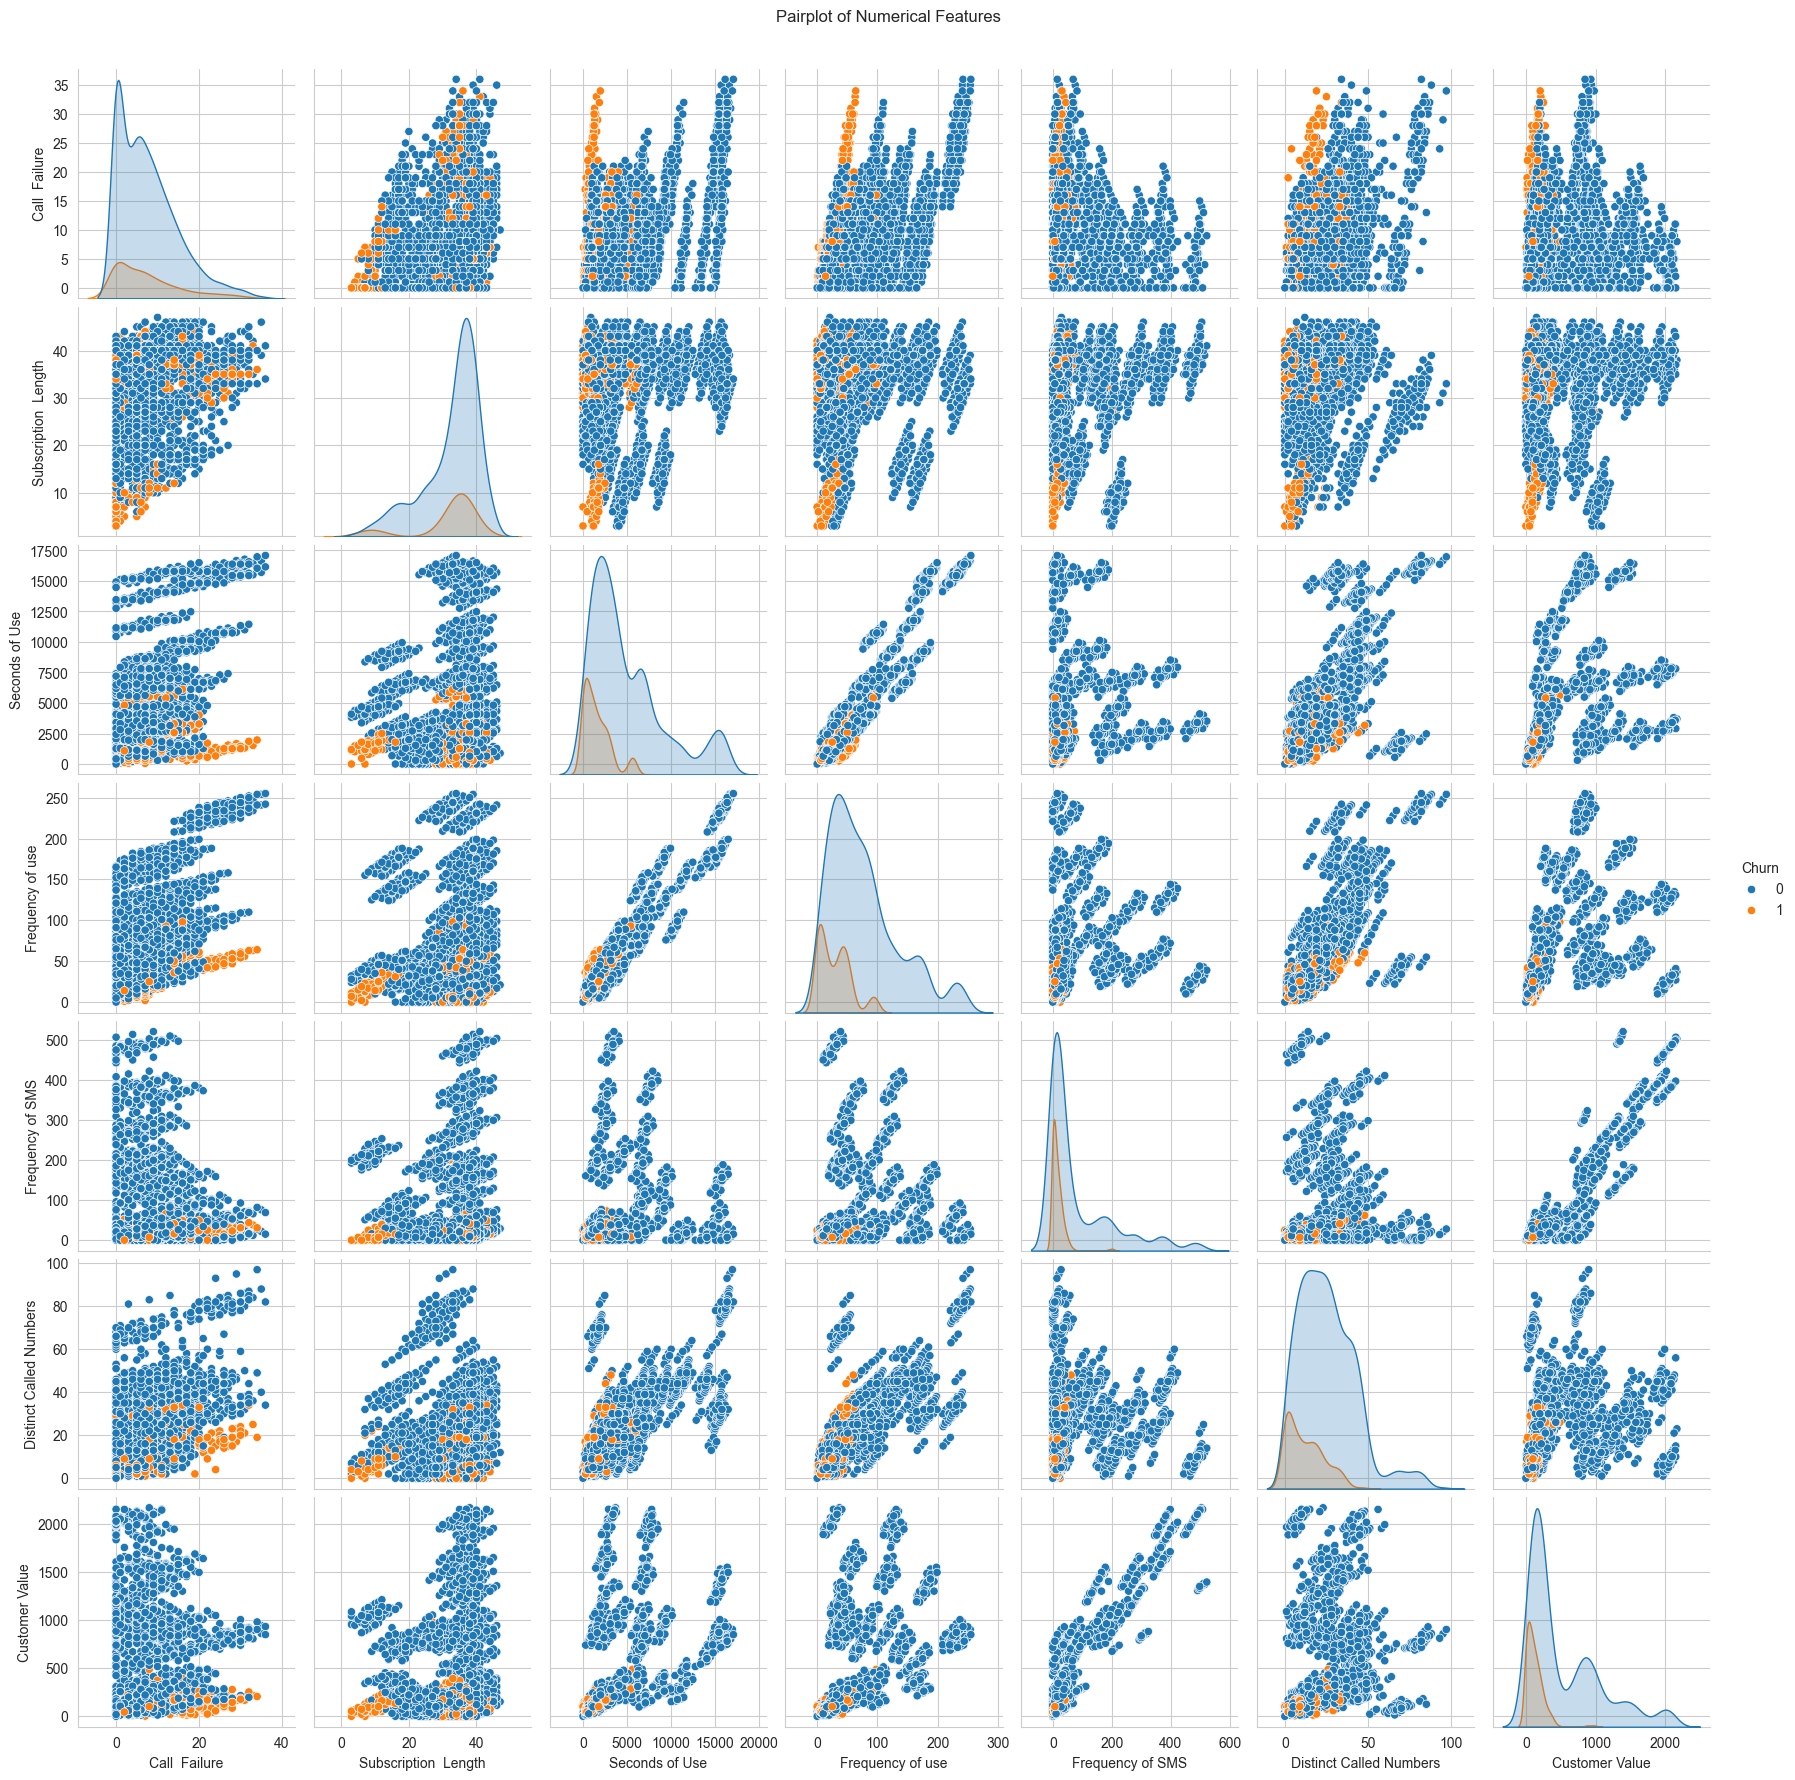

In [59]:
# plot pairplot to see the correlation between numerical features
sns.pairplot(churn_data[numerical_features + ['Churn']], hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()